In [5]:
!pip install pyspark

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("game skill analysis").getOrCreate()

In [8]:
df = spark.read.csv("/content/cod1.csv", header=True, inferSchema=True)

In [9]:
df.show()

+--------------------+------+-------+-------+-----+-------+
|            username|  wins|  kills|kdratio|level| deaths|
+--------------------+------+-------+-------+-----+-------+
|     RggRt45#4697369|   0.0|    0.0|    0.0|  1.0|    0.0|
|  JohniceRex#9176033|   0.0|    0.0|    0.0|  1.0|   16.0|
|bootybootykill#18...|   0.0|   66.0|   1.03|  9.0|   64.0|
|       JNaCo#5244172|   3.0|    2.0|    0.4|  1.0|    5.0|
|gomezyayo_007#659...|   0.0|    2.0|    0.2|  1.0|   10.0|
|Brxndoon7-LK#4002715| 684.0|27011.0|   1.07|177.0|25321.0|
|  bdooory_ab#7095171|   4.0|  162.0|   0.63|  6.0|  256.0|
|  ahevepluto#3505304| 186.0| 1898.0|   0.57| 37.0| 3332.0|
|MilkyLemonz-_-#59...| 741.0|21803.0|   1.04|185.0|21032.0|
|   RPDUNKduo#8122914|  26.0|  349.0|   0.44| 12.0|  786.0|
|     BOBOQQ3#7928912|   0.0|    0.0|    0.0|  1.0|    0.0|
|     Rachetevolution|   0.0|   26.0|   0.34|  6.0|   77.0|
|CzarnyDelfinek#90...| 188.0| 1949.0|    1.5| 53.0| 1303.0|
|Damian291207#7986887|   0.0|    0.0|   

In [10]:
df.printSchema()

root
 |-- username: string (nullable = true)
 |-- wins: double (nullable = true)
 |-- kills: double (nullable = true)
 |-- kdratio: double (nullable = true)
 |-- level: double (nullable = true)
 |-- deaths: double (nullable = true)



In [11]:
df.describe().show()

+-------+--------------+------------------+------------------+-------------------+-----------------+-----------------+
|summary|      username|              wins|             kills|            kdratio|            level|           deaths|
+-------+--------------+------------------+------------------+-------------------+-----------------+-----------------+
|  count|          1558|              1558|              1558|               1558|             1558|             1558|
|   mean|          NULL|  153.002567394095|3753.0019255455713| 0.6371052631578951|44.41463414634146|3875.397946084724|
| stddev|          NULL|301.98476611542344| 7929.696675054974|0.43040543740793535|68.31806374035718|7992.666442604237|
|    min|052397#4248023|               0.0|               0.0|                0.0|              1.0|              0.0|
|    max|  한조#6598141|            3519.0|           66935.0|                3.0|            435.0|          67888.0|
+-------+--------------+------------------+-------

In [12]:
filter_df= df.filter(df["wins"] > 500)
filter_df.show()

+------------------------------+------+-------+-------+-----+-------+
|                      username|  wins|  kills|kdratio|level| deaths|
+------------------------------+------+-------+-------+-----+-------+
|          Brxndoon7-LK#4002715| 684.0|27011.0|   1.07|177.0|25321.0|
|          MilkyLemonz-_-#59...| 741.0|21803.0|   1.04|185.0|21032.0|
|               Nsory_1#5583298|1592.0|15033.0|   0.78|156.0|19265.0|
|               DeGiove#5248918| 605.0| 7764.0|   0.85| 63.0| 9099.0|
|           SharkPawgin#5823839| 642.0|10577.0|   0.85|144.0|12425.0|
|               Jacyków#9892624| 536.0| 1081.0|   0.61| 42.0| 1771.0|
|          FaZe Splitter#101...| 504.0|12870.0|   1.26|141.0|10182.0|
|              Russbuck#9798189| 601.0|12340.0|   0.89|171.0|13862.0|
|              AskarkGG#9024740| 758.0|21133.0|   1.04|188.0|20256.0|
|                 infamousabe84| 724.0|32052.0|   0.97|252.0|33100.0|
|             420_Vegas#7916528| 655.0|14541.0|   1.07|142.0|13650.0|
|             livern

In [13]:
agg_df= df.groupBy('username').agg({'kills':'mean'})
agg_df.show()

+--------------------+----------+
|            username|avg(kills)|
+--------------------+----------+
|         DecidedRock|   15010.0|
|o-Blasphemy-o#808...|    7716.0|
|      Aust1n#9602011|   11218.0|
|     PereaNK_9994454|     386.0|
|nicktheslayer#277...|      52.0|
|anon58589014#2976628|   10001.0|
|      Jincar#7728971|       0.0|
|            Bacon780|    6536.0|
|            chadneel|       9.0|
|UCD_281771416519u...|       1.0|
|            STLBEATZ|    2199.0|
|Brxndoon7-LK#4002715|   27011.0|
|   icicle_df#8753477|     260.0|
| MALAGITA99A#6166325|       0.0|
|eslenderman53_88#...|       0.0|
|     Tico666#2179290|    1618.0|
|MauroVarela1920#3...|      14.0|
|   Xia-Alois#4944758|       0.0|
|PVT FishCooch#441...|   15605.0|
|orelperets660#856...|       0.0|
+--------------------+----------+
only showing top 20 rows



In [14]:
df.createOrReplaceTempView("gamedata")

In [15]:
result= spark.sql("SELECT username, AVG(wins) FROM gamedata GROUP BY username")
result.show()

+--------------------+---------+
|            username|avg(wins)|
+--------------------+---------+
|         DecidedRock|    586.0|
|o-Blasphemy-o#808...|    254.0|
|      Aust1n#9602011|    222.0|
|     PereaNK_9994454|    163.0|
|nicktheslayer#277...|      1.0|
|anon58589014#2976628|    307.0|
|      Jincar#7728971|      0.0|
|            Bacon780|    356.0|
|            chadneel|      0.0|
|UCD_281771416519u...|      1.0|
|            STLBEATZ|    130.0|
|Brxndoon7-LK#4002715|    684.0|
|   icicle_df#8753477|      3.0|
| MALAGITA99A#6166325|      0.0|
|eslenderman53_88#...|      0.0|
|     Tico666#2179290|    109.0|
|MauroVarela1920#3...|      2.0|
|   Xia-Alois#4944758|      0.0|
|PVT FishCooch#441...|    461.0|
|orelperets660#856...|      1.0|
+--------------------+---------+
only showing top 20 rows



In [16]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.sql import DataFrame

In [17]:
feature_columns = ["wins", "kills", "kdratio", "level", "deaths"]

In [18]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

In [19]:
kmeans = KMeans(k=5, seed=1)  # Assuming we want to cluster into 2 groups
model = kmeans.fit(df_assembled)

In [20]:
predictions = model.transform(df_assembled)

In [21]:
predictions.select("username", "prediction").show()

+--------------------+----------+
|            username|prediction|
+--------------------+----------+
|     RggRt45#4697369|         0|
|  JohniceRex#9176033|         0|
|bootybootykill#18...|         0|
|       JNaCo#5244172|         0|
|gomezyayo_007#659...|         0|
|Brxndoon7-LK#4002715|         1|
|  bdooory_ab#7095171|         0|
|  ahevepluto#3505304|         0|
|MilkyLemonz-_-#59...|         3|
|   RPDUNKduo#8122914|         0|
|     BOBOQQ3#7928912|         0|
|     Rachetevolution|         0|
|CzarnyDelfinek#90...|         0|
|Damian291207#7986887|         0|
|          SanDrasoSa|         0|
|  DrunkUnc92#7705654|         2|
|whoshotghost#1916366|         0|
|     Nsory_1#5583298|         3|
|          LimpThaDon|         0|
|     DeGiove#5248918|         2|
+--------------------+----------+
only showing top 20 rows



In [22]:
df_pd = predictions.select("wins", "kills", "prediction").toPandas()

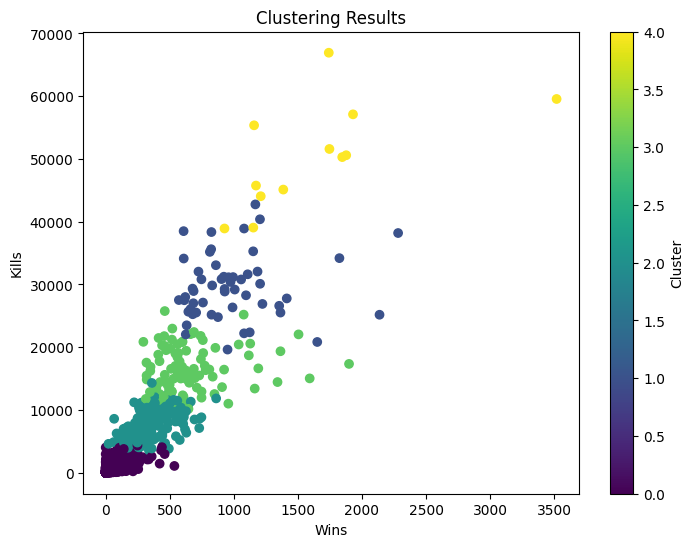

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pd["wins"], df_pd["kills"], c=df_pd["prediction"], cmap='viridis')
plt.title("Clustering Results")
plt.xlabel("Wins")
plt.ylabel("Kills")
plt.colorbar(label="Cluster")
plt.show()

In [24]:
df_pd = df.toPandas()

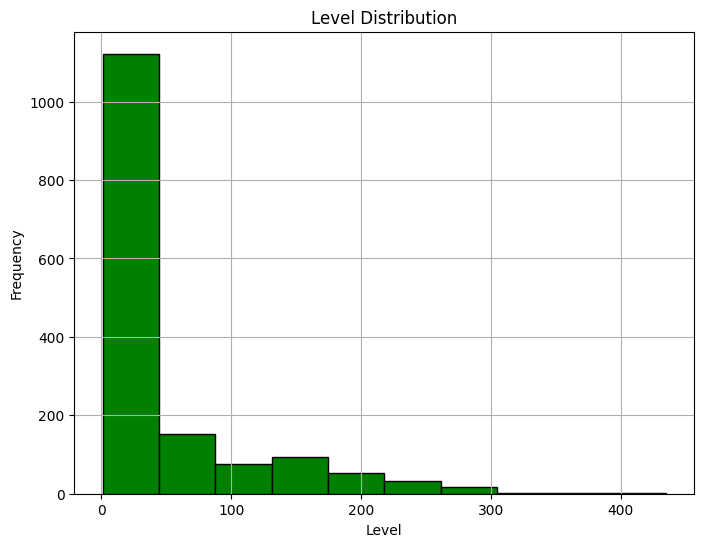

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df_pd["level"], bins=10, color='green', edgecolor='black')
plt.title("Level Distribution")
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

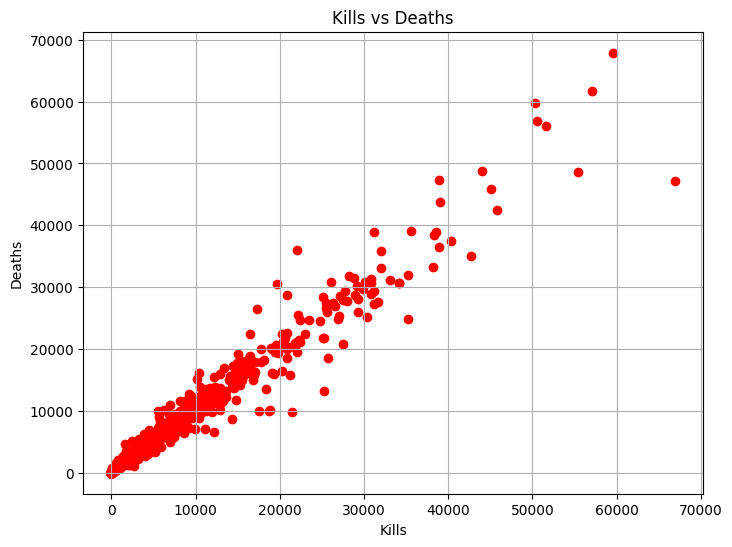

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pd["kills"], df_pd["deaths"], color='red')
plt.title("Kills vs Deaths")
plt.xlabel("Kills")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()

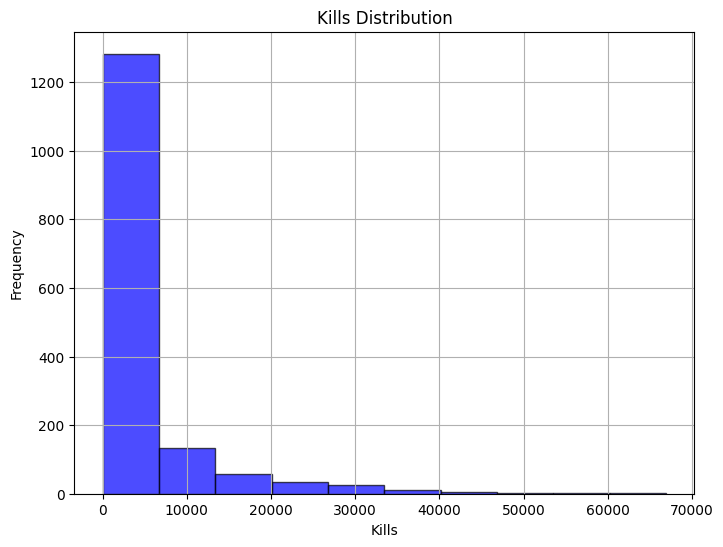

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df_pd["kills"], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title("Kills Distribution")
plt.xlabel("Kills")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


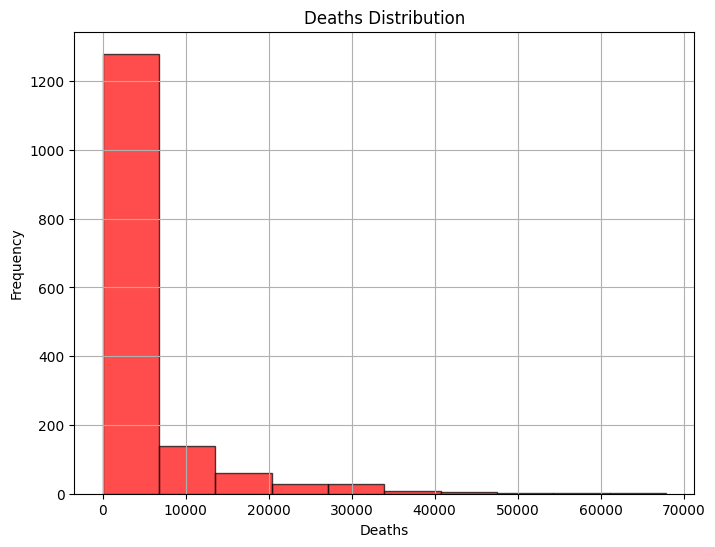

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(df_pd["deaths"], bins=10, color='red', edgecolor='black', alpha=0.7)
plt.title("Deaths Distribution")
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()